# E-commerce Marketing and Shopping EDA & Hypothesis testing with Python

### Problem statement:
To conduct a thorough exploratory data analysis (EDA) and hypothesis testing on two comprehensive datasets one containing information on customers visiting the shopping site for purchase and another that has demographic, purchase, and marketing information about the group of people

2 datasets :- 
1. Shopping dataset
2. Campaign Dataset

## 1. Shopping dataset

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A . Preprocessing of data (Basic EDA) 

In [134]:
data_1 = pd.read_csv("shopping.csv")
data_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [135]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [136]:
data_1['Weekend'] = data_1['Weekend'].astype(int)
data_1['Revenue'] = data_1['Revenue'].astype(int)

In [137]:
data_1.shape

(12330, 18)

In [138]:
# Count of null values in each column
data_1.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

__Observations:__
- Data has 12330 rows and 8 columns  (12330 X 8)
- No column has Null values
- Page categories : Administartive,Informational ,ProductRelated

In [139]:
# Creating a function to calculate value_counts for all the column mentioned in col_list paramter for data (dataframe)
def unique_value_count(data,col_list):
    for i in col_list:
        print(f'Unique Values of Column {i} :-')
        print(data[i].value_counts(),end='\n\n')

In [140]:
# Selecting some of the important columns whose unique values along with their count needs to be checked 
check_1 = ['Month','OperatingSystems','SpecialDay','Browser','Region',
     'TrafficType','VisitorType','Weekend','Revenue']
unique_value_count(data_1,check_1)

Unique Values of Column Month :-
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Unique Values of Column OperatingSystems :-
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Unique Values of Column SpecialDay :-
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Unique Values of Column Browser :-
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Unique Values of Column Region :-
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Unique Values of Column TrafficType :-
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11 

In [141]:
# Checking the count of users who have visited atleast 1 page of type - Administrative,Informational,ProductRelated.
def page_type_count(data,a):
    for i in a:
        samp_ = data[i].value_counts()
        cnt_ = samp_[samp_.index != 0].sum()
        print(f'Count of users who have visited atleast 1 page of type {i}= {cnt_} ')

def avg_duration_type(data,a):
    for i in a:
        cnt_ = data[data[i.split("_")[0]] != 0].shape[0]
        print(f'Average Time Spend by each user on {i.split("_")[0]} type of page = {data[i].sum()/cnt_ }')

        
check_2 = ['Administrative','Informational','ProductRelated']
page_type_count(data_1,check_2)

print()
check_3 = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']
avg_duration_type(data_1,check_3)

Count of users who have visited atleast 1 page of type Administrative= 6562 
Count of users who have visited atleast 1 page of type Informational= 2631 
Count of users who have visited atleast 1 page of type ProductRelated= 12292 

Average Time Spend by each user on Administrative type of page = 151.85819383572263
Average Time Spend by each user on Informational type of page = 161.55251480381034
Average Time Spend by each user on ProductRelated type of page = 1198.4397081203738


__Observations:__
- In Month of 'May' maximum count ( = 3364 ) of users visited the page followed by Nov , Mar and Dec . Rest of the month have lesser count of users visiting page as compared to May,Nov,Mar and Dec.

- Operating System : Most users who are viewing a Page are using Operating System 2,1,3 . Most used operating system by users is operating system 2.

- Most of the users are located in region 1,3,4 and 2

-   10551 users are Returning_Visitors and 1694 are new visitors . High count of returning visitor siginify that the shopping site is able to retain its customers (focus more on retaining as compared to acquiring new customers -based on count)

- 9462 users are visiting the page (session on) on a weekday and 2868 users are visiting page on weekday.

- Revenue column data tells that 1908 users completed the purchase and 10422 users did not complete the purchase.

- From above we can conclude that number of users visting ProductRelated type of Page (12292 users) is more as compared to Administrative (6562 users) and Informational (2631 users)type of page. Which tells us that users prefer ProductRelated pages for 
- Average time spend by each user on ProductRelated ( approx. time 1198 )  type of page is much more than Informational (approx. time 162) and Administrative (approx. time 152 ) type of pages. 

In [142]:
data_1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


### Generating a binary feature indicating whether the user visited all three page categories
- If user visited all 3 page categories Then True else Flase

In [143]:
data_1.loc[:,'Visited_3_PageCat'] = (data_1['ProductRelated'] != 0) & (data_1['Administrative'] != 0) & (data_1['Informational'] != 0)
data_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Visited_3_PageCat
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,False


In [144]:
data_1['Visited_3_PageCat'].value_counts()

False    10163
True      2167
Name: Visited_3_PageCat, dtype: int64

In [145]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [146]:
# Checking if there is any record where user did not visit any of the 3 types of pages.
data_1[(data_1['ProductRelated'] == 0) & (data_1['Administrative'] == 0) & 
       (data_1['Informational'] == 0)]

# This tell us there are 6 users who did not visit any of the 3 types of pages in shopping site and 
# they all are returning customers.

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Visited_3_PageCat
2683,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,May,3,2,3,18,Returning_Visitor,1,0,False
3187,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,May,2,2,8,3,Returning_Visitor,0,0,False
5557,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,9,3,Returning_Visitor,0,0,False
5800,0,0.0,0,0.0,0,0.0,0.18,0.181818,0.0,0.0,June,2,2,7,6,Returning_Visitor,0,0,False
8052,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,9,2,Returning_Visitor,0,0,False
11865,0,0.0,0,0.0,0,0.0,0.20,0.200000,0.0,0.0,Nov,1,1,8,8,Returning_Visitor,0,0,False


### B. Univariate Analysis:

#### Box Plot

In [147]:
numeric_type = ['int64', 'float64','int32']
cols_ = data_1.select_dtypes(include=numeric_type).columns
cols_

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')

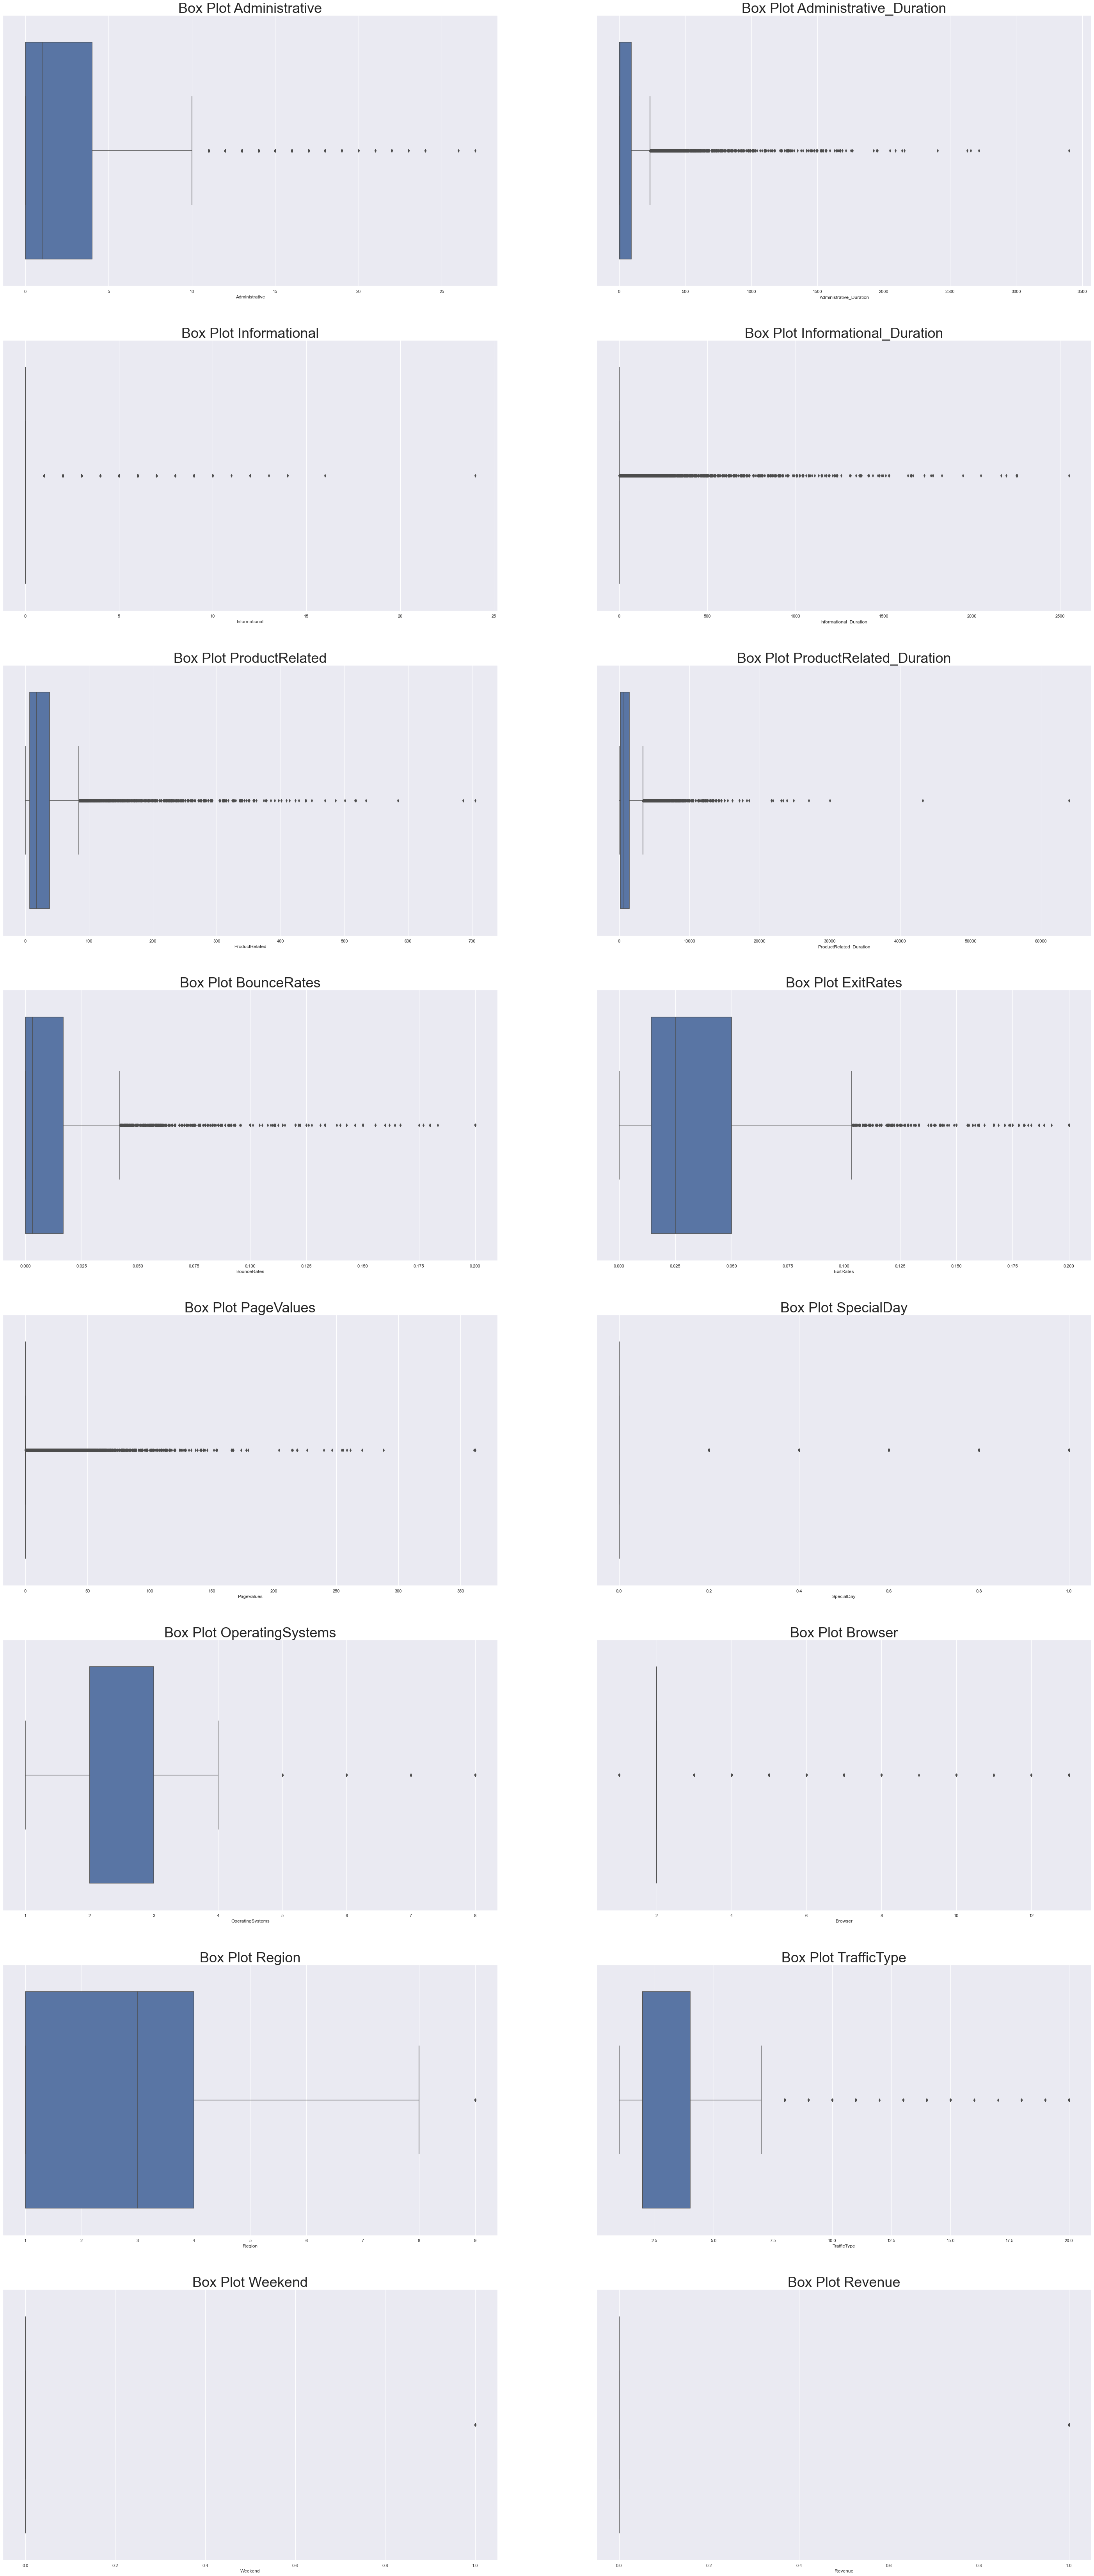

In [148]:
fig, axis = plt.subplots(nrows=8, ncols=2, figsize=(50, 120))
i = 0
j = 0
sns.set(font_scale=3)
for col_name in cols_ :
    sns.boxplot(x=data_1[col_name],ax=axis[i,j])
    axis[i,j].set_title('Box Plot '+col_name)
    if j != 1:
        j+=1 
    else:
        j = 0
        i+= 1
plt.show()

#### Histogram Plot

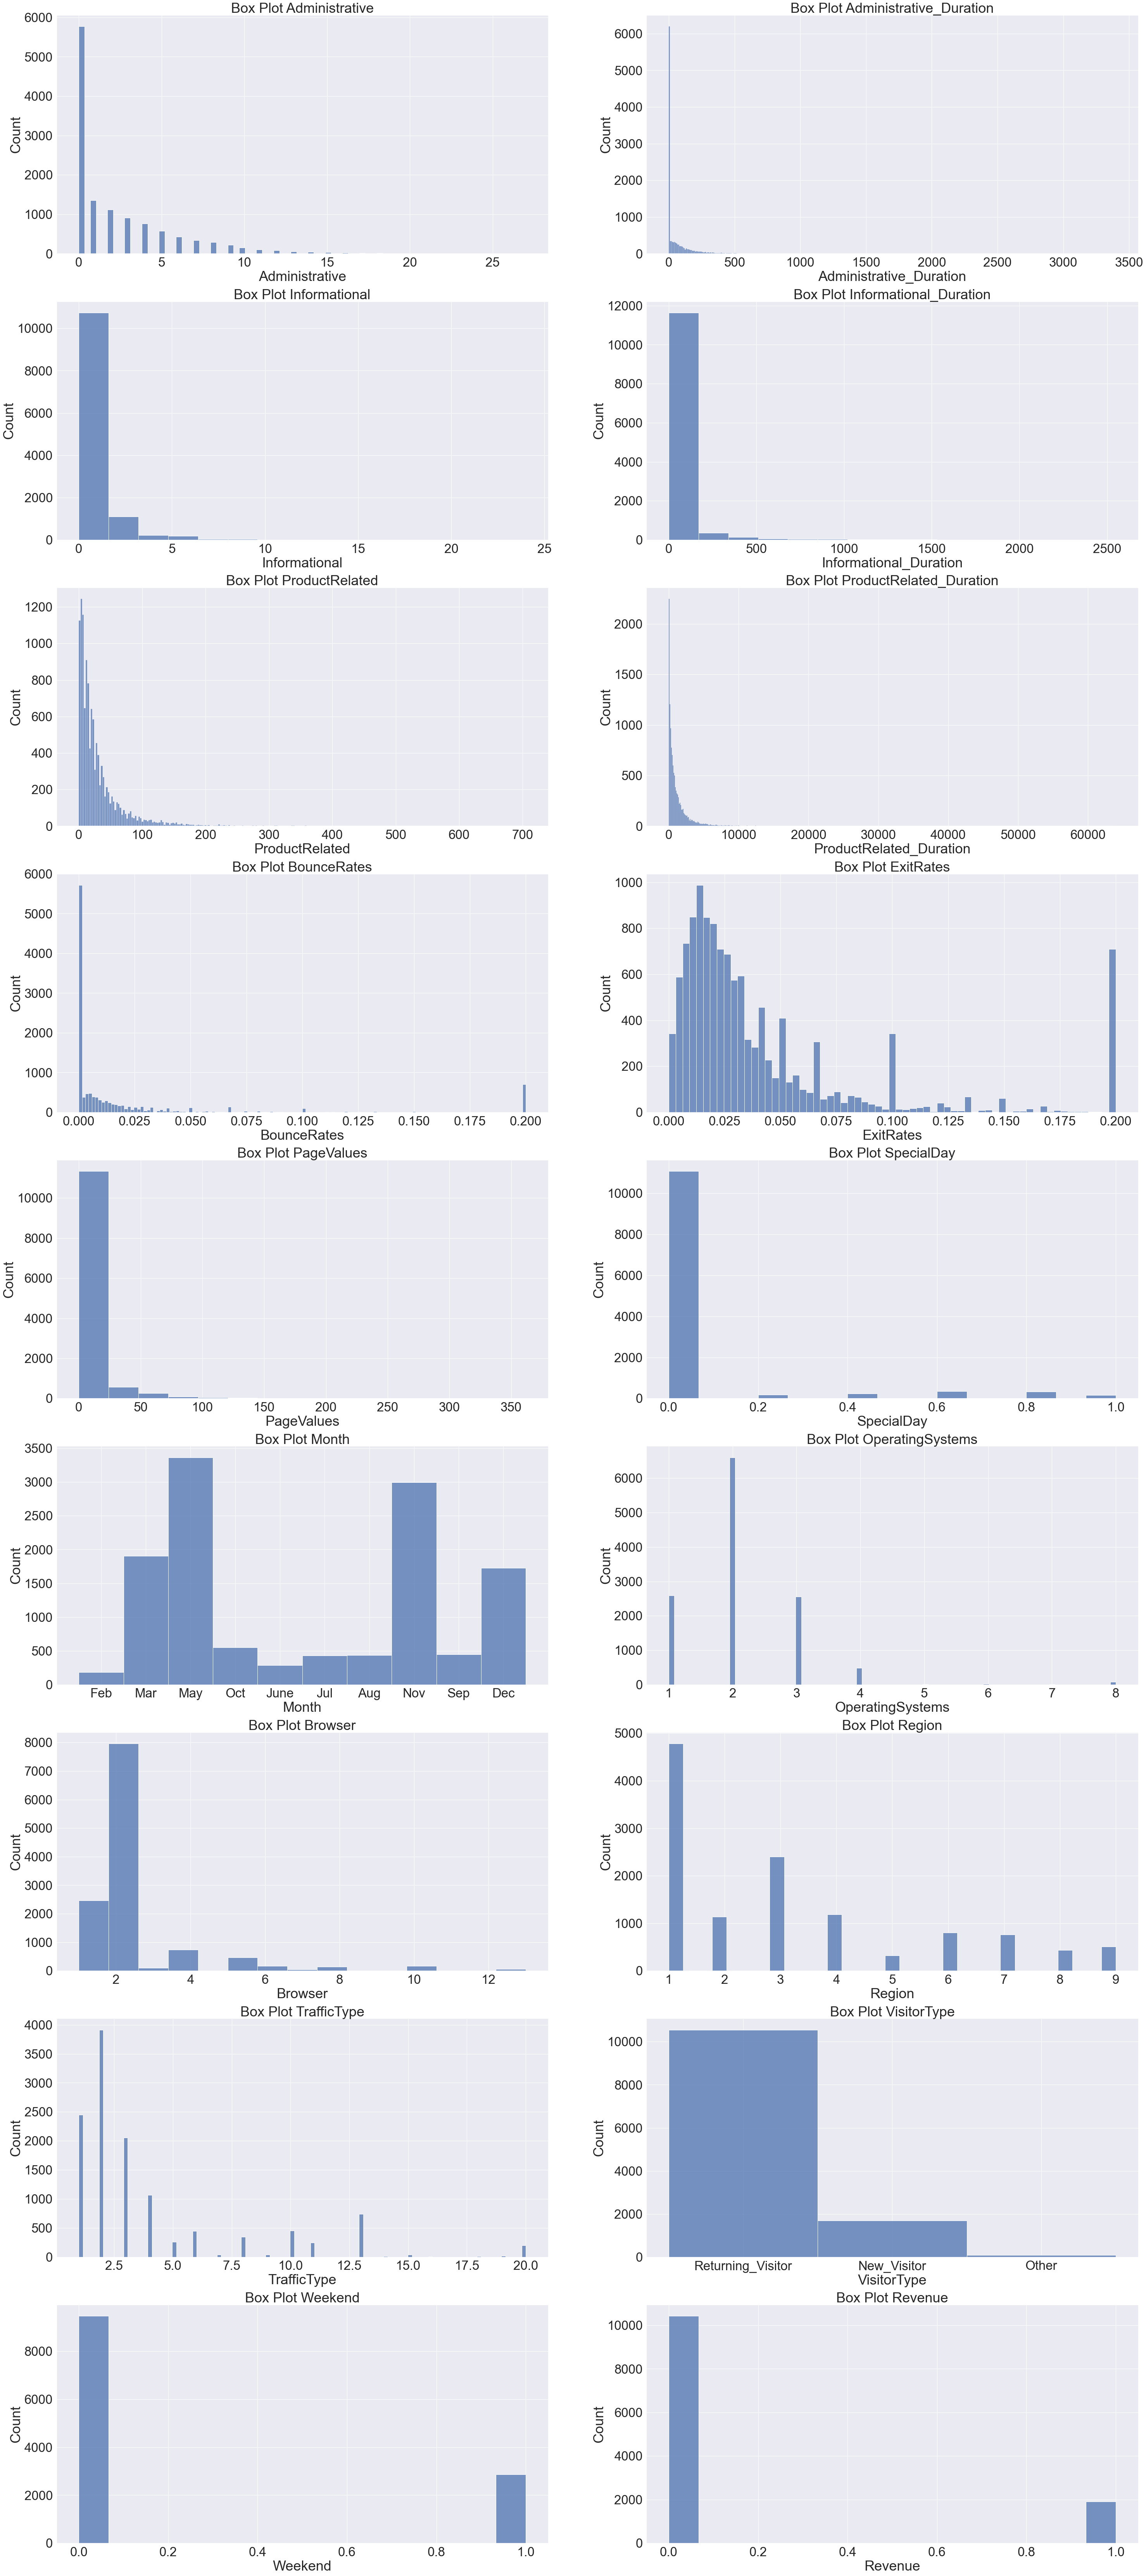

In [149]:

numeric_type = ['int64', 'float64','int32','object']
cols_ = data_1.select_dtypes(include=numeric_type).columns

fig, axis = plt.subplots(nrows=9, ncols=2, figsize=(50, 120))
i = 0
j = 0
sns.set(font_scale=3)
for col_name in cols_ :
    sns.histplot(x=data_1[col_name],ax=axis[i,j])
    axis[i,j].set_title('Box Plot '+col_name)
    if j != 1:
        j+=1 
    else:
        j = 0
        i+= 1
plt.show()

#### Observation 
- People gnerally dont visit Adinstritive and Informational Page

### C. Correlation Analysis and Visualizations: 

In [150]:
data_1.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Visited_3_PageCat
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917,0.465933
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587,0.322306
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200,0.709973
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345,0.444008
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538,0.348282
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373,0.335717
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673,-0.142045
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071,-0.201192
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569,0.067179
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305,-0.056042


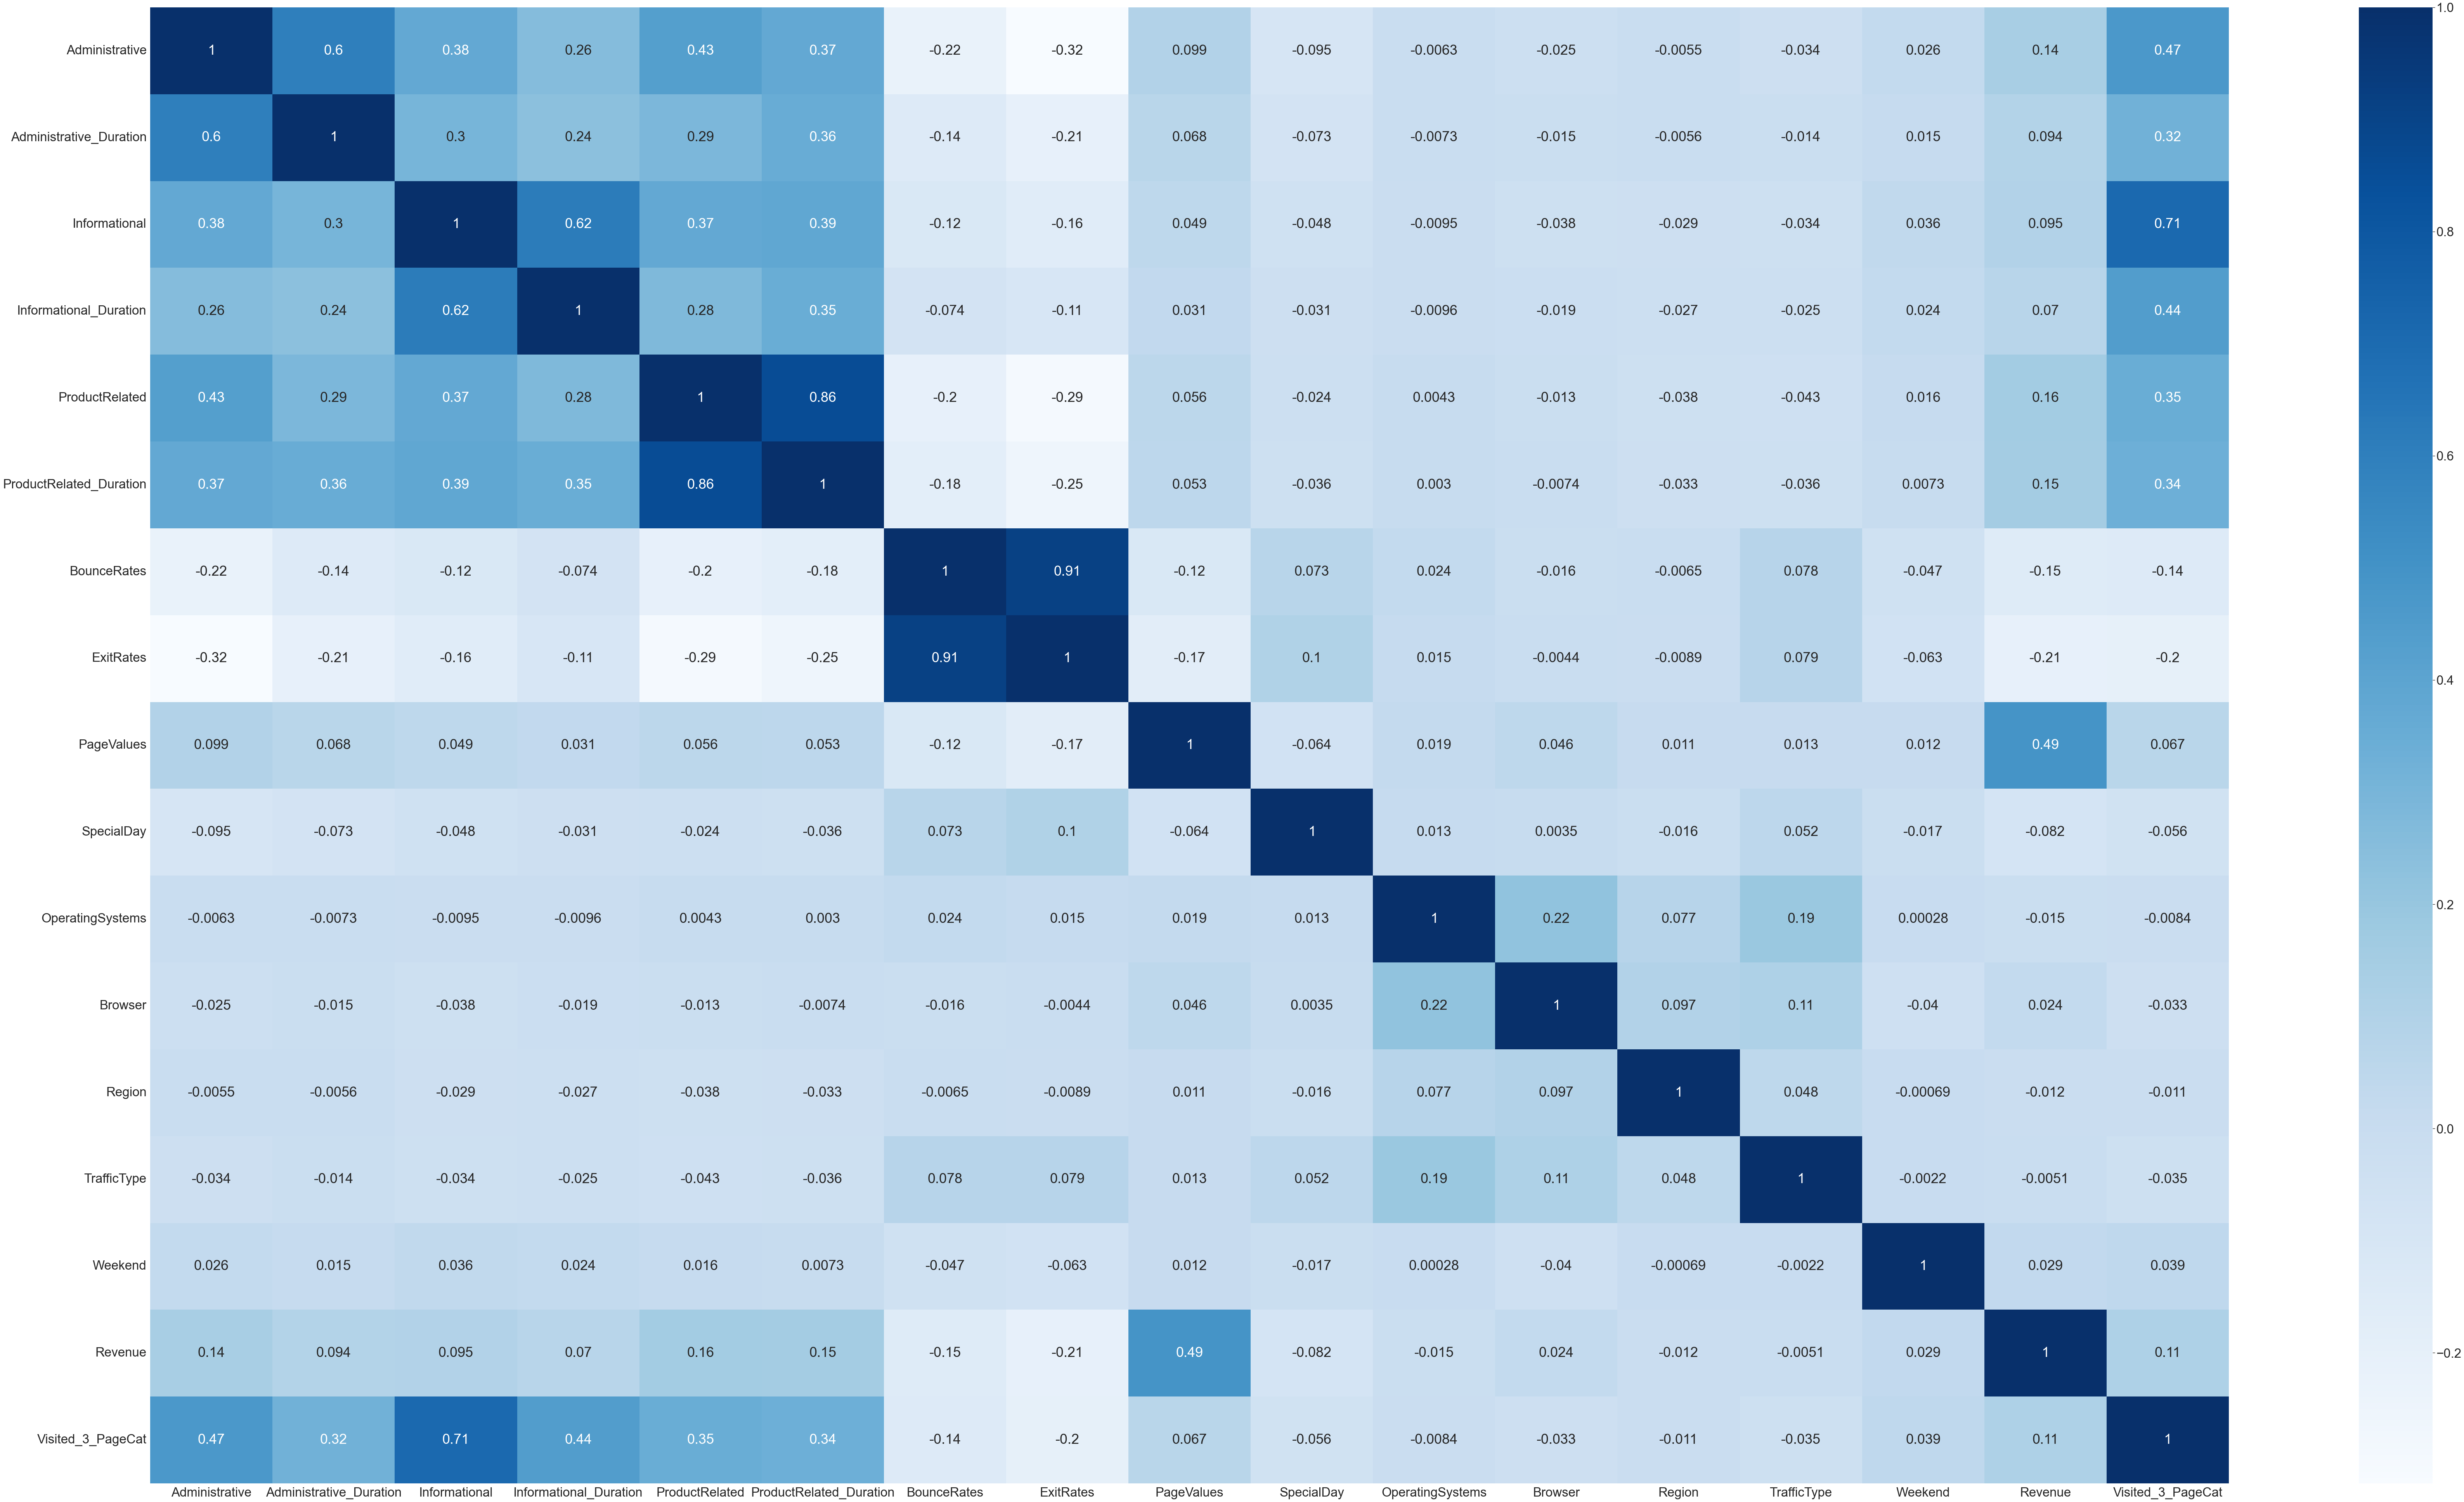

In [151]:
plt.figure(figsize=(120,70))
sns.heatmap(data_1.corr(),cmap='Blues',annot=True)
plt.show()

In [152]:
data_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Visited_3_PageCat
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0,False


### D. Class Distribution: Revenue Column

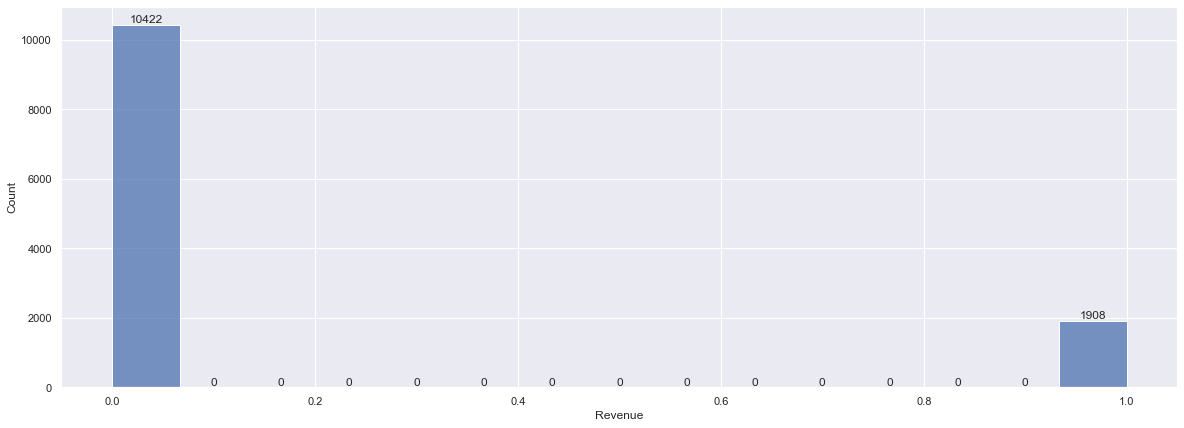

In [153]:
plt.figure(figsize=(20,7))
sns.set(font_scale=1)
ax = sns.histplot(x= data_1['Revenue'])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

__Observation:__
- Out of 12,330 sessions in the dataset 84.5% (10,422)  were negative class samples that did not end with shopping ,rest (1908) were positive class samples ending with shopping.


### E. Summarize page views, durations, and bounce/exit rates for each page category

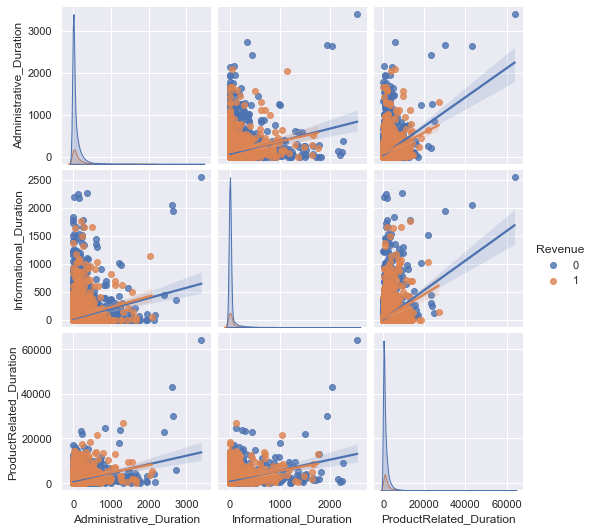

In [154]:
sns.set(font_scale=1)
sns.pairplot(data_1.loc[:,['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Revenue']],hue='Revenue',kind='reg')

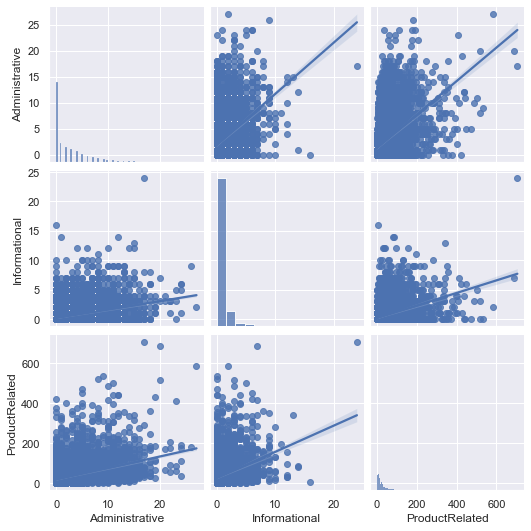

In [155]:
sns.pairplot(data_1.loc[:,['Administrative','Informational','ProductRelated']],kind='reg')

Text(0.5, 0, 'Administrative Page_Count')

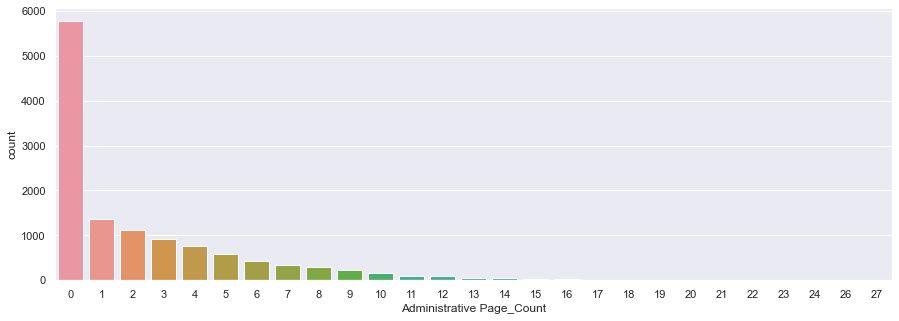

In [156]:
plt.figure(figsize=(15,5))
sns.countplot(x='Administrative',data=data_1)
plt.xlabel('Administrative Page_Count')

Text(0.5, 0, 'Informational Page Count')

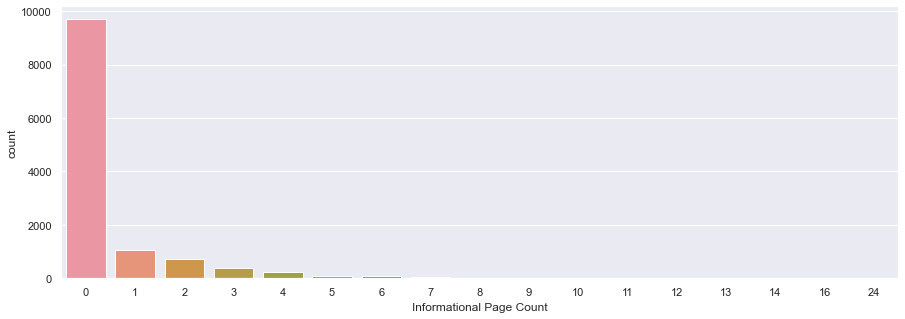

In [157]:
plt.figure(figsize=(15,5))
sns.countplot(x='Informational',data=data_1)
plt.xlabel('Informational Page Count')

Text(0.5, 0, 'ProductRelated Page Count')

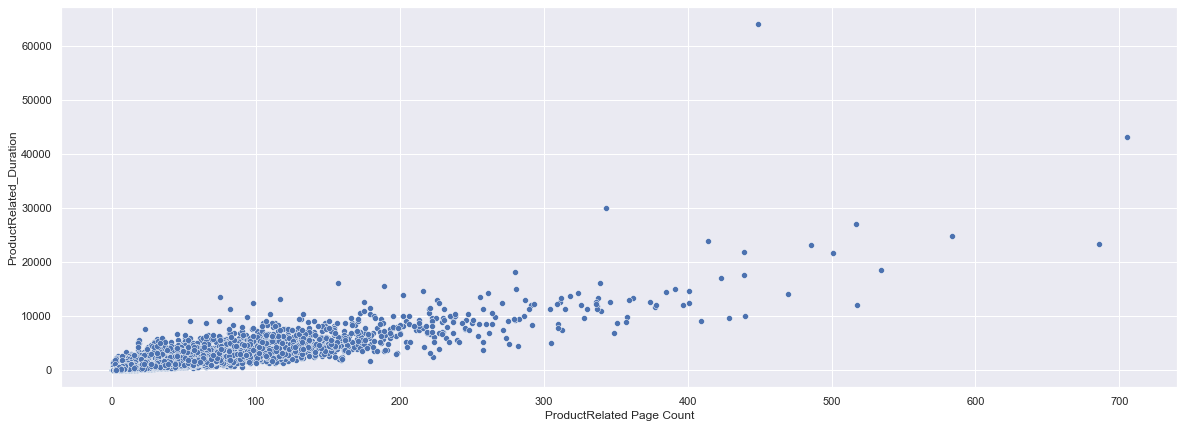

In [158]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',data=data_1)
plt.xlabel('ProductRelated Page Count')

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

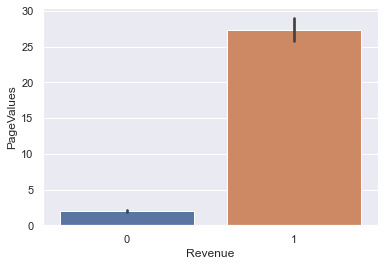

In [159]:
sns.barplot(y='PageValues',x='Revenue', data=data_1)

In [160]:
data_1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


#### Observation :
- If the page values are more i.e if number of pages visited by user is more, then thers more chance of earning revenue.

### F.  SpecialDay distribution and its correlation with Revenue.

In [161]:
br =data_1.groupby('Revenue')['SpecialDay'].value_counts()
br

Revenue  SpecialDay
0        0.0           9248
         0.6            322
         0.8            314
         0.4            230
         0.2            164
         1.0            144
1        0.0           1831
         0.6             29
         0.2             14
         0.4             13
         0.8             11
         1.0             10
Name: SpecialDay, dtype: int64

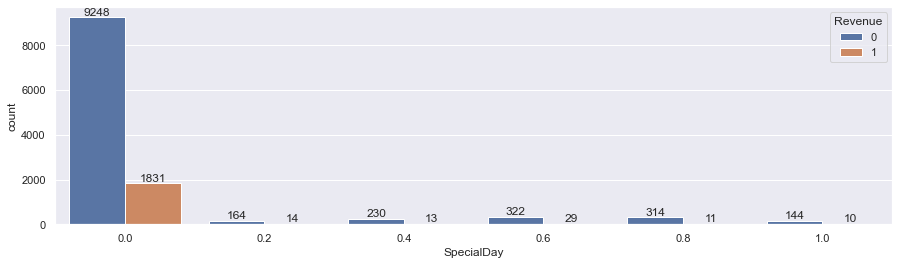

In [162]:
plt.figure(figsize=(15,4))
samp_1 = data_1.loc[data_1['Revenue'] == 1,:]
ax = sns.countplot(data=data_1,x='SpecialDay',hue='Revenue')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

#### Observation :-
- We can see that as special_day increase there is not much change in count of users who completed purchase (revenue = 1)

### G. PageValues distribution and its relationship with TrafficType, VisitorType, and Region.

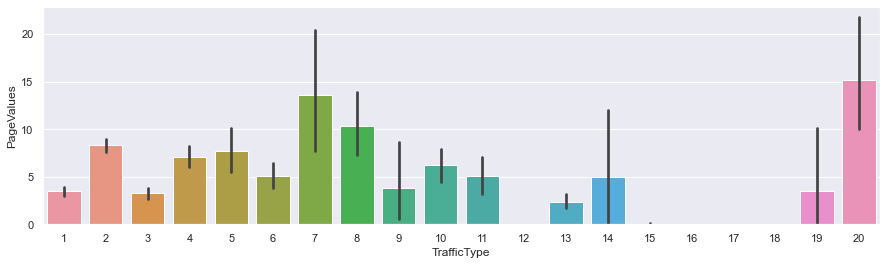

In [163]:
plt.figure(figsize=(15,4))
sns.barplot(x= 'TrafficType' , y= 'PageValues', data = data_1 )
plt.show()

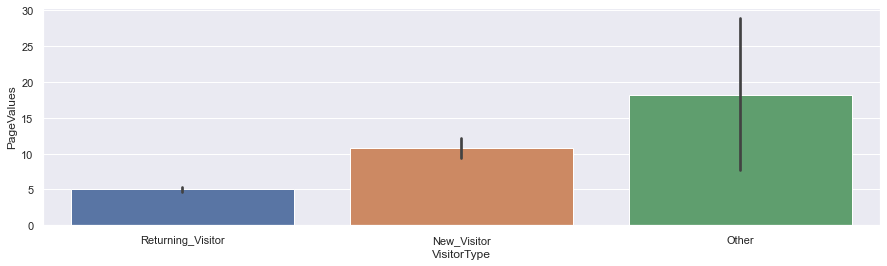

In [164]:
plt.figure(figsize=(15,4))
sns.barplot(x= 'VisitorType' , y= 'PageValues', data = data_1 )
plt.show()

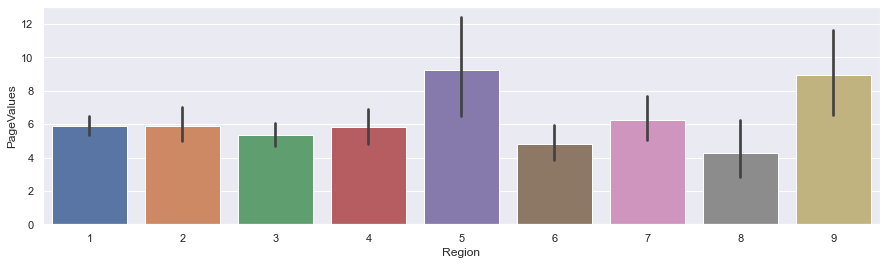

In [165]:
plt.figure(figsize=(15,4))
sns.barplot(x= 'Region' , y= 'PageValues', data = data_1 )
plt.show()

#### Observation :
- User belonging to Traffic type 20,7 and 8 has high Page Values ( PageValue more than 10 ) . 
- Users of Vistor Type Other has highest PageValue and ReturningVisitor has least Page value.
- Users belonging Region 5 and 9 have the highest page values among all the region . Rest all regions Page Value distribution is almost similar .

### H. Investigating user session lengths and their impact on conversion rates

In [166]:
# Creating new column having total duration - Administrative_Duration + Informational_Duration + ProductRelated_Duration
data_1['Total_Duration'] = data_1['Administrative_Duration'] + data_1['Informational_Duration'] + data_1['ProductRelated_Duration']

In [167]:
bins_ = [-1,500,1000,1500,2000,2500,3000,10000,100000]
labels_ = ['0 to 500','500 to 1000','1000 to 1500','1500 to 2000' ,'2000 to 2500','2500 to 3000' ,'3000 to 10000',
           'More than 10000' ]
data_1['Duration_Bins'] = pd.cut(x=data_1['Total_Duration'],bins = bins_ , labels = labels_ )
data_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Visited_3_PageCat,Total_Duration,Duration_Bins
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,Returning_Visitor,0,0,False,0.000000,0 to 500
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,Returning_Visitor,0,0,False,64.000000,0 to 500
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,4,1,9,3,Returning_Visitor,0,0,False,0.000000,0 to 500
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,Returning_Visitor,0,0,False,2.666667,0 to 500
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,Returning_Visitor,1,0,False,627.500000,500 to 1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,Returning_Visitor,1,0,False,1928.791667,1500 to 2000
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,Returning_Visitor,1,0,False,465.750000,0 to 500
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,Returning_Visitor,1,0,False,184.250000,0 to 500
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,Returning_Visitor,0,0,False,421.000000,0 to 500


In [168]:
br=data_1.groupby('Revenue')['Duration_Bins'].value_counts()
br

Revenue                 
0        0 to 500           4775
         500 to 1000        1981
         1000 to 1500       1124
         3000 to 10000       895
         1500 to 2000        720
         2000 to 2500        517
         2500 to 3000        348
         More than 10000      62
1        500 to 1000         438
         0 to 500            368
         3000 to 10000       349
         1000 to 1500        290
         1500 to 2000        182
         2000 to 2500        147
         2500 to 3000         99
         More than 10000      35
Name: Duration_Bins, dtype: int64

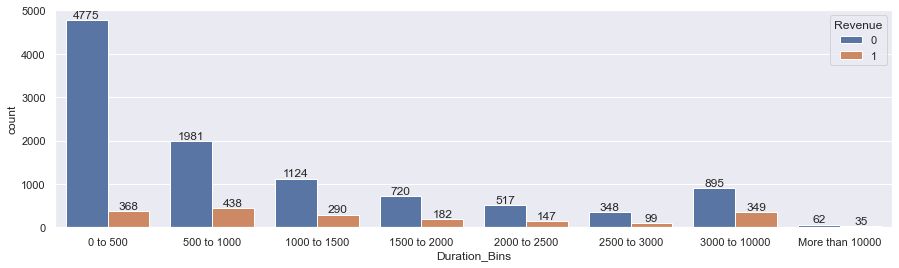

In [169]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data = data_1 , x = 'Duration_Bins' ,hue ='Revenue')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<AxesSubplot:xlabel='Duration_Bins', ylabel='count'>

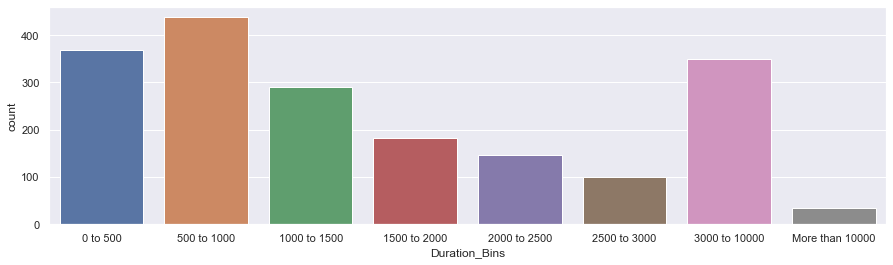

In [170]:
# Filter only those record from where revenue coming : using samp_1
plt.figure(figsize=(15,4))
samp_1 = data_1.loc[data_1['Revenue'] == 1,:]
sns.countplot(data=samp_1,x='Duration_Bins')

#### Observation : 
- As the duration on total time spend on page ( any of 3 page type) increases the chances of user completing purchase increase.
- Seeing the people who have made puchases (revenue =1 ) we can see most of the customer are belonging to duration_bin 500 to 1000 follwed by 0 to 500 , 30000 to 10000 .

### I. Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.


In [171]:
br=data_1.groupby('Revenue')['OperatingSystems'].value_counts()
br

Revenue  OperatingSystems
0        2                   5446
         3                   2287
         1                   2206
         4                    393
         8                     62
         6                     17
         7                      6
         5                      5
1        2                   1155
         1                    379
         3                    268
         4                     85
         8                     17
         6                      2
         5                      1
         7                      1
Name: OperatingSystems, dtype: int64

<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

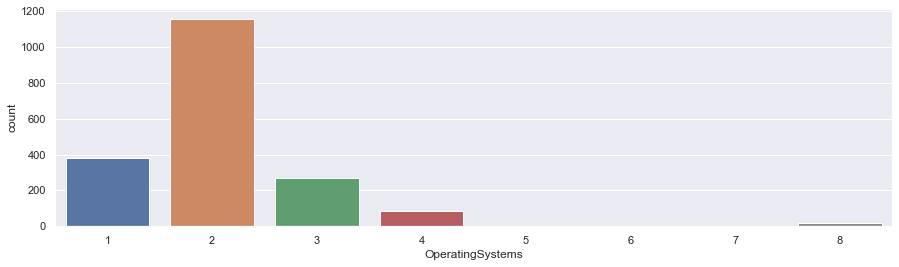

In [172]:
# Filter only those record from where revenue coming : using samp_1
plt.figure(figsize=(15,4))
samp_1 = data_1.loc[data_1['Revenue'] == 1,:]
sns.countplot(data=samp_1,x='OperatingSystems')


In [173]:
br=data_1.groupby('Revenue')['VisitorType'].value_counts()
br

Revenue  VisitorType      
0        Returning_Visitor    9081
         New_Visitor          1272
         Other                  69
1        Returning_Visitor    1470
         New_Visitor           422
         Other                  16
Name: VisitorType, dtype: int64

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

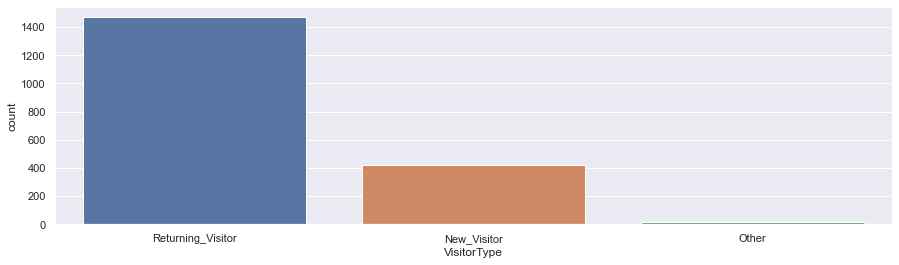

In [174]:
# Filter only those record from where revenue coming : using samp_1
plt.figure(figsize=(15,4))
sns.countplot(data=samp_1,x='VisitorType')

In [175]:
br=data_1.groupby('Revenue')['Region'].value_counts()
br

Revenue  Region
0        1         4009
         3         2054
         4         1007
         2          948
         6          693
         7          642
         9          425
         8          378
         5          266
1        1          771
         3          349
         2          188
         4          175
         7          119
         6          112
         9           86
         8           56
         5           52
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

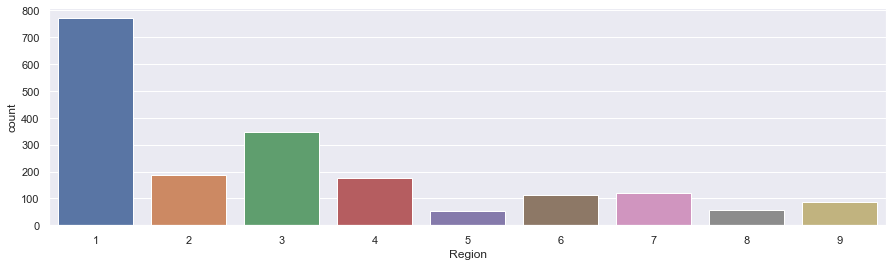

In [176]:
# Filter only those record from where revenue coming : using samp_1
plt.figure(figsize=(15,4))
sns.countplot(data=samp_1,x='Region')

#### Observation :
- People usually use Operating System '2'. And the Revenue is often earn when someomne use Operating System '2'.
- People of Region '1' often do online shoping. People living in Region '1' are more prone to do deal. Its good to show the ads in Region '1', if want to get more public attention.
- Most of the people doing purchase are Returning Visitors and then follwed by New Visitors.

### J. Segment users based on TrafficType and analyze their engagement patterns and purchase probability.

In [177]:
br=data_1.groupby('Revenue')['TrafficType'].value_counts()
br

Revenue  TrafficType
0        2              3066
         1              2189
         3              1872
         4               904
         13              695
         6               391
         10              360
         8               248
         5               204
         11              200
         20              148
         9                38
         15               38
         7                28
         19               16
         14               11
         18               10
         16                2
         12                1
         17                1
1        2               847
         1               262
         3               180
         4               165
         8                95
         10               90
         5                56
         6                53
         20               50
         11               47
         13               43
         7                12
         9                 4
         14           

<AxesSubplot:xlabel='TrafficType', ylabel='count'>

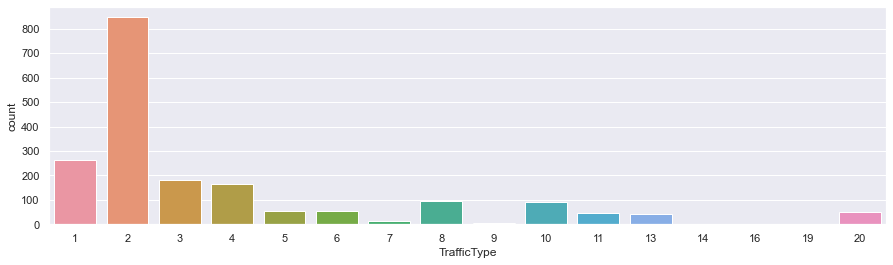

In [178]:
# Filter only those record from where revenue coming 

sns.set(font_scale=1)
plt.figure(figsize=(15,4))
sns.countplot(data=samp_1,x='TrafficType')

<AxesSubplot:xlabel='TrafficType', ylabel='count'>

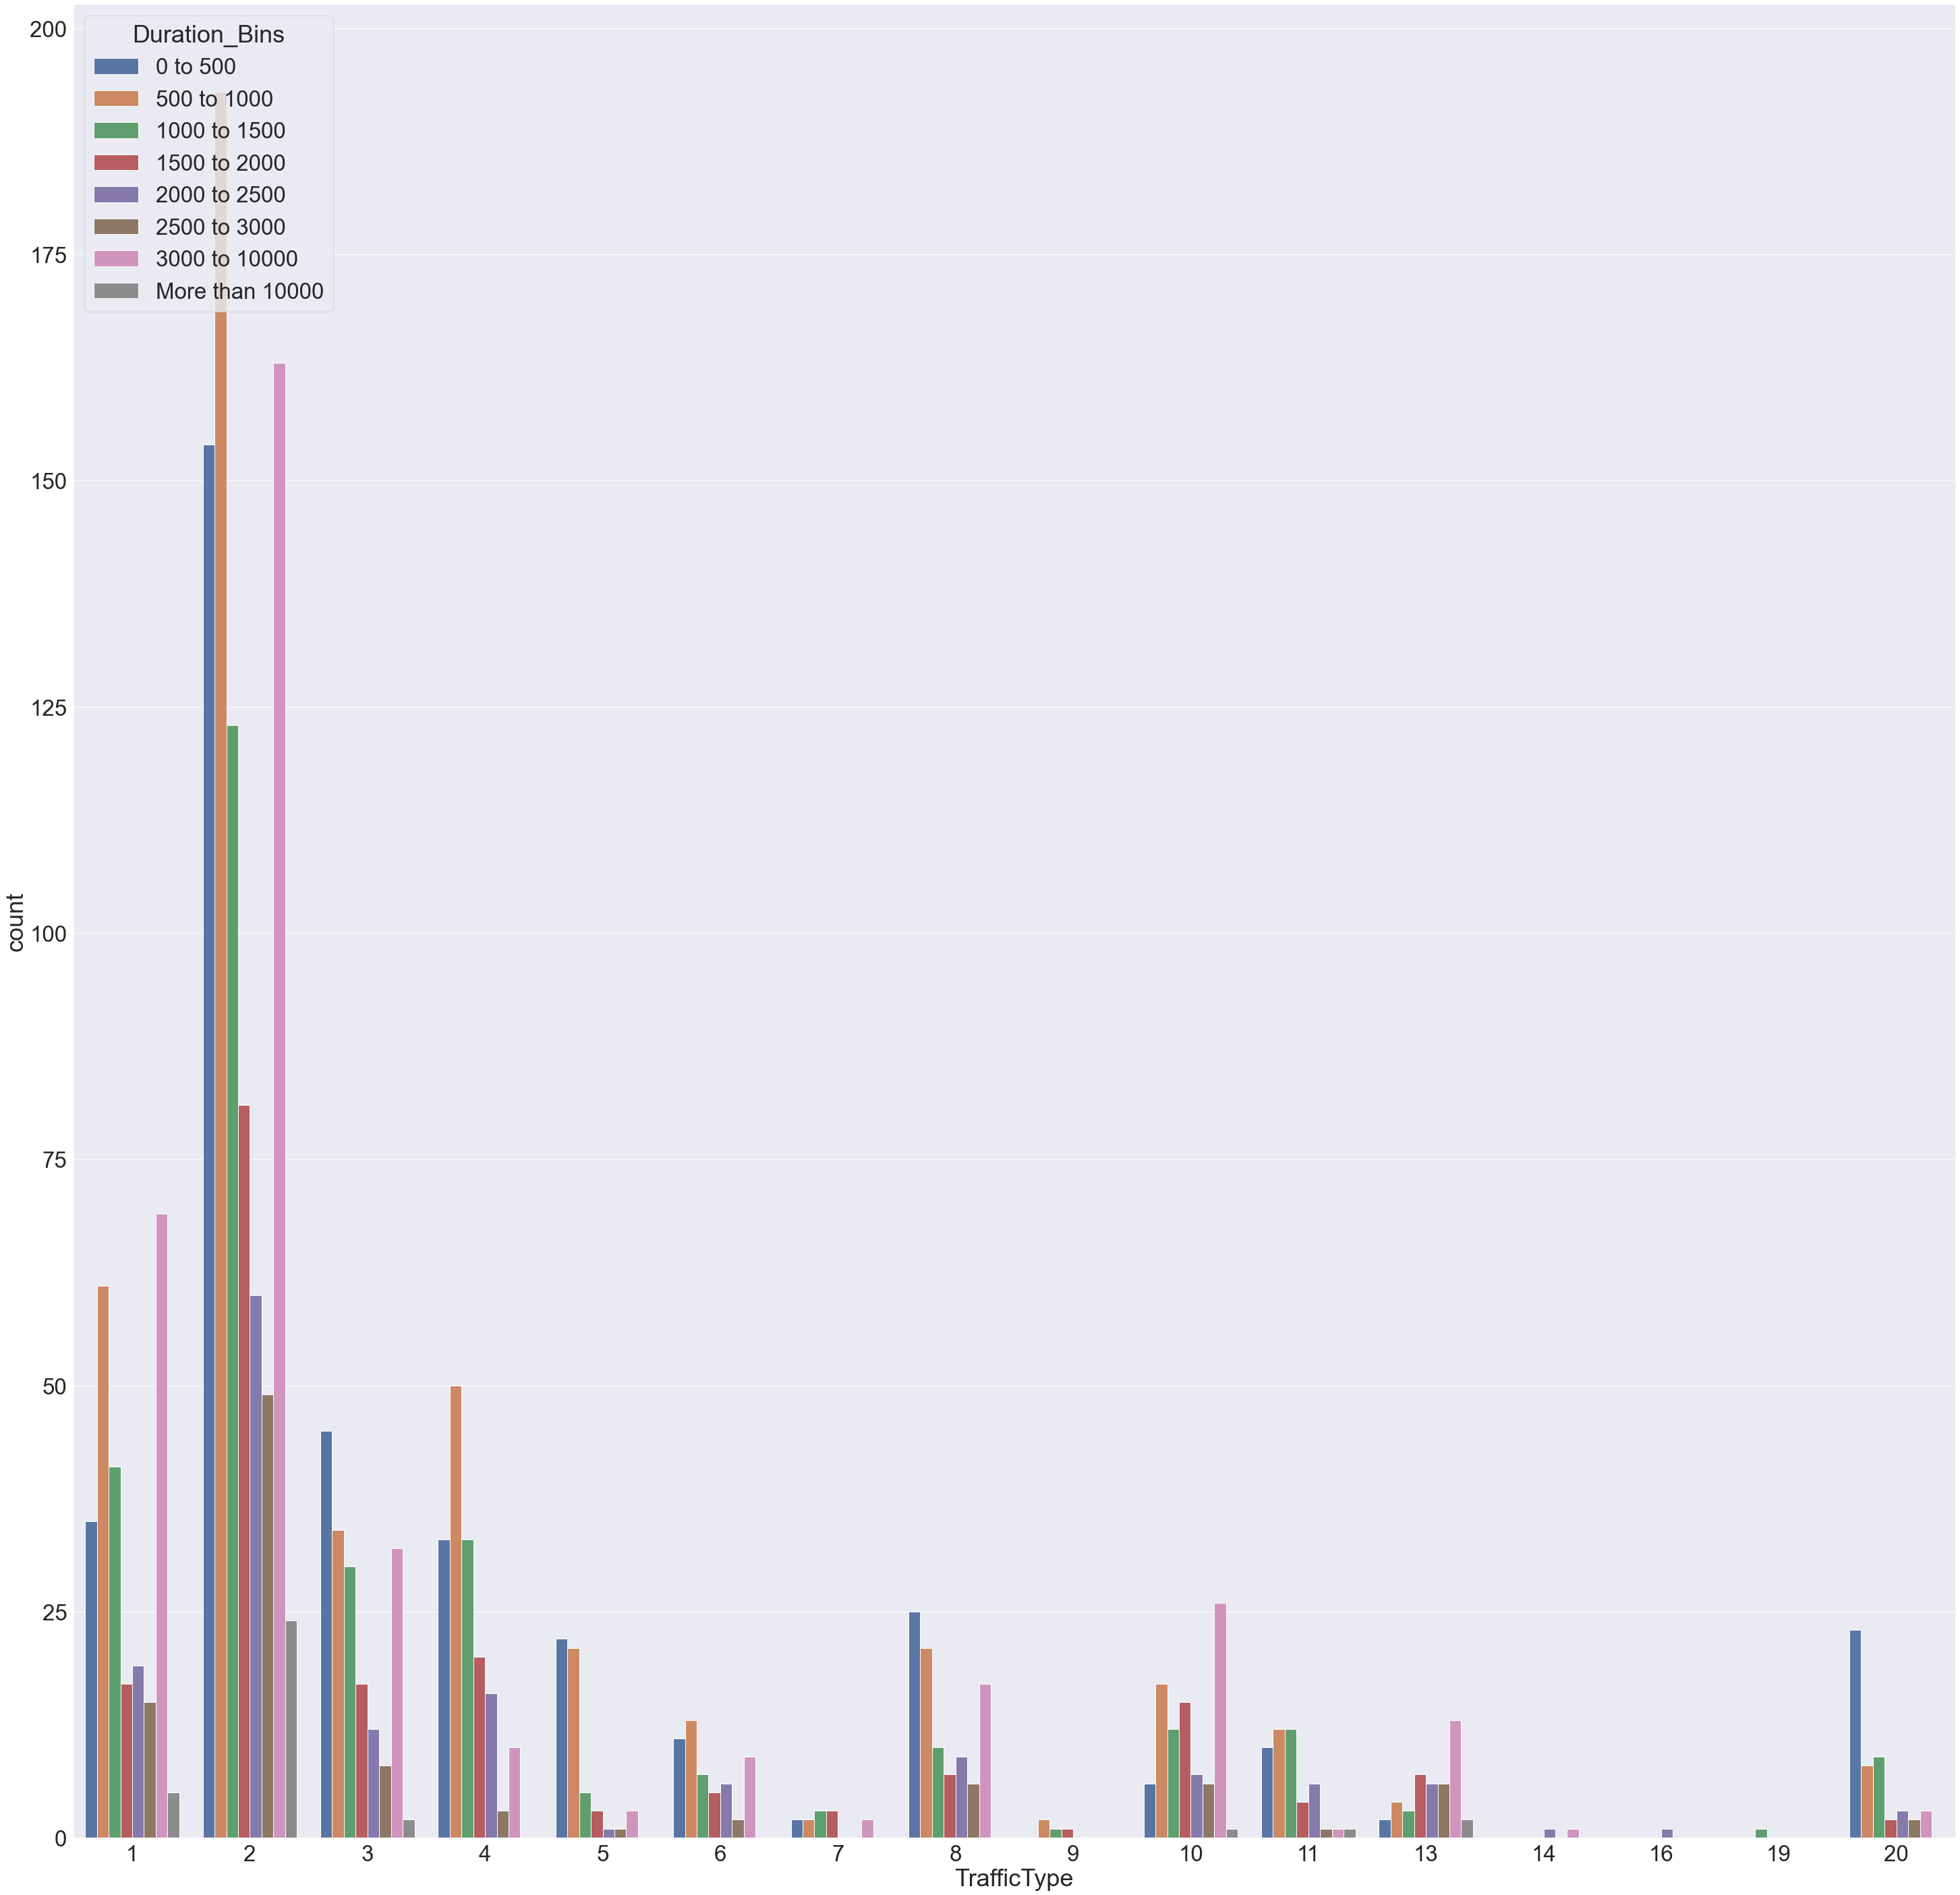

In [179]:
plt.figure(figsize=(50,50))
sns.set(font_scale=3)
sns.countplot(data=samp_1,x='TrafficType',hue='Duration_Bins')

#### Observation :
- Traffic Type or mode of medium '2' is best way to advertise or convey the product to people as most of the people are redirected to the website by medium '2'.


## Observations and Recommendations :- 
- Data has 12330 rows and 8 columns (12330 X 8)
- No column has Null values
- Page categories : Administartive,Informational ,ProductRelated

__Based on unique values present:__
- In Month of 'May' maximum count ( = 3364 ) of users visited the page followed by Nov , Mar and Dec . Rest of the month have lesser count of users visiting page as compared to May,Nov,Mar and Dec.

- Operating System : Most users who are viewing a Page are using Operating System 2,1,3 . Most used operating system by users is operating system 2.

- Most of the users are located in region 1,3,4 and 2

- 10551 users are Returning_Visitors and 1694 are new visitors . High count of returning visitor siginify that the shopping site is able to retain its customers (focus more on retaining as compared to acquiring new customers -based on count)

- 9462 users are visiting the page (session on) on a weekday and 2868 users are visiting page on weekday.

- Revenue column data tells that 1908 users completed the purchase and 10422 users did not complete the purchase.

- From above we can conclude that number of users visting ProductRelated type of Page (12292 users) is more as compared to Administrative (6562 users) and Informational (2631 users)type of page. Which tells us that users prefer ProductRelated pages for

- Average time spend by each user on ProductRelated ( approx. time 1198 ) type of page is much more than Informational (approx. time 162) and Administrative (approx. time 152 ) type of pages.

__Other Observations:__
- People generally don't visit Administrative and Informational Page
- Out of 12,330 sessions in the dataset 84.5% (10,422) were negative class samples that did not end with shopping ,rest (1908) were positive class samples ending with shopping.
- If the page values are more i.e if number of pages visited by user is more, then thers more chance of earning revenue.
- We can see that as special_day increase there is not much change in count of users who completed purchase (revenue = 1)
- User belonging to Traffic type 20,7 and 8 has high Page Values ( PageValue more than 10 ) .
- Users of Vistor Type Other has highest PageValue and ReturningVisitor has least Page value.
- Users belonging Region 5 and 9 have the highest page values among all the region . Rest all regions Page Value distribution is almost similar .
- As the duration on total time spend on page ( any of 3 page type) increases the chances of user completing purchase increase.
- Seeing the people who have made puchases (revenue =1 ) we can see most of the customer are belonging to duration_bin 500 to 1000 follwed by 0 to 500 , 30000 to 10000 .
- People usually use Operating System '2'. And the Revenue is often earn when someomne use Operating System '2'.
- People of Region '1' often do online shoping. People living in Region '1' are more prone to do deal. Its good to show the ads in Region '1', if want to get more public attention.
- Most of the people doing purchase are Returning Visitors and then follwed by New Visitors.
- Traffic Type or mode of medium '2' is best way to advertise or convey the product to people as most of the people are redirected to the website by medium '2'.

__Recommendations:__
1. Newer Products / COntent must be released in ProductRelated Pages as most users are visitng this page.
2. As there is around 88% of data were user did not complete purchase , so new way can be introduced like Specia Offercs Unlock on Buying products each weak , re-targetting ads based on search history on shopping sit , offering limited time discounts to users with very high time spend duration on page but not completing any purchase.
3. As  Most of the people doing purchase are Returning Visitors , so shopping site shoul try to acquire new customers  - introducing referral programs to award their loyal customers bringing in new customer can be one of the ways to increase new customerbase.
4. Data shows As the duration on total time spend on page increases the chances of user completing purchase increase. So the interface / website /pltform should be made very user friedly taking into cusideration highest level of user comfort and ease.One way to increase user time spend on page can be giving daily rewards to users who spend few minutes on website and these rewards can be applied as discount to products.
5. People usually use Operating System '2' . So new changes or any new application released should be done taking into consideration its use in Operating System foremost.